In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
#create a cities list
cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # add city to list if not already in list of cities
    if city not in cities:
        cities.append(city)
        
len(cities)

590

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [25]:
# create list to hold city weather data
city_data = []

#print beginning of the logs
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters
city_record = 1
record_set = 1
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging
    if (i % 50 == 0 and i >= 50):
        record_set += 1
        city_record = 1
    # create url for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the url, record, and set number and the city.
    print(f"Processing Record {city_record} of Set {record_set} | {city}")
    
    #Add one to the record count
    city_record += 1
    try:
        city_weather = requests.get(city_url).json()
          
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | samusu
City not found. Skipping...
Processing Record 2 of Set 1 | tchollire
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | sisimiut
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | kupang
Processing Record 13 of Set 1 | samarai
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | nabire
Processing Record 16 of Set 1 | lalomanu
City not found. Skipping...
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | coahuayana
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | paracuru
Processing Record 21 of Set 1 | avera
Processing Record 22 of Set 1 | butaritari

Processing Record 42 of Set 4 | marcona
City not found. Skipping...
Processing Record 43 of Set 4 | komsomolskiy
Processing Record 44 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 45 of Set 4 | la ronge
Processing Record 46 of Set 4 | xinyu
Processing Record 47 of Set 4 | tuatapere
Processing Record 48 of Set 4 | elk city
Processing Record 49 of Set 4 | krasnyy chikoy
Processing Record 50 of Set 4 | kahului
Processing Record 1 of Set 5 | san carlos
Processing Record 2 of Set 5 | nova olinda do norte
Processing Record 3 of Set 5 | longyearbyen
Processing Record 4 of Set 5 | oktyabrskoye
Processing Record 5 of Set 5 | norman wells
Processing Record 6 of Set 5 | nandi
Processing Record 7 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 5 | san ramon
Processing Record 9 of Set 5 | wakkanai
Processing Record 10 of Set 5 | san cristobal
Processing Record 11 of Set 5 | road town
Processing Record 12 of Set 5 | hasaki
Processing Record 13 of 

Processing Record 31 of Set 8 | luba
Processing Record 32 of Set 8 | muroto
Processing Record 33 of Set 8 | barinas
Processing Record 34 of Set 8 | hukuntsi
Processing Record 35 of Set 8 | humaita
Processing Record 36 of Set 8 | bathsheba
Processing Record 37 of Set 8 | mercedes
Processing Record 38 of Set 8 | nipawin
Processing Record 39 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 40 of Set 8 | ubinskoye
Processing Record 41 of Set 8 | viligili
City not found. Skipping...
Processing Record 42 of Set 8 | zyryanka
Processing Record 43 of Set 8 | touros
Processing Record 44 of Set 8 | port hedland
Processing Record 45 of Set 8 | toamasina
Processing Record 46 of Set 8 | phalaborwa
Processing Record 47 of Set 8 | capao da canoa
Processing Record 48 of Set 8 | palm beach
Processing Record 49 of Set 8 | menongue
Processing Record 50 of Set 8 | namibe
Processing Record 1 of Set 9 | evanston
Processing Record 2 of Set 9 | petropavlovskoye
Processing Record 3 of Set 9 

Processing Record 15 of Set 12 | sataua
City not found. Skipping...
Processing Record 16 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 17 of Set 12 | sylvan lake
Processing Record 18 of Set 12 | chaupimarca
Processing Record 19 of Set 12 | roald
Processing Record 20 of Set 12 | nagato
Processing Record 21 of Set 12 | pangody
Processing Record 22 of Set 12 | elbistan
Processing Record 23 of Set 12 | poronaysk
Processing Record 24 of Set 12 | benguela
Processing Record 25 of Set 12 | houma
Processing Record 26 of Set 12 | tiruvottiyur
City not found. Skipping...
Processing Record 27 of Set 12 | wanning
Processing Record 28 of Set 12 | seoul
Processing Record 29 of Set 12 | sungairaya
Processing Record 30 of Set 12 | taltal
Processing Record 31 of Set 12 | lyngseidet
Processing Record 32 of Set 12 | algiers
Processing Record 33 of Set 12 | tsienyane
City not found. Skipping...
Processing Record 34 of Set 12 | port shepstone
Processing Record 35 of Set 12 | ilulis

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tchollire,8.4022,14.1698,70.36,96,100,1.59,CM,2021-07-31 18:35:46
1,Bluff,-46.6000,168.3333,47.80,95,100,6.13,NZ,2021-07-31 18:32:11
2,Yellowknife,62.4560,-114.3525,78.33,60,20,1.01,CA,2021-07-31 18:32:09
3,Vaini,-21.2000,-175.2000,71.76,88,90,13.80,TO,2021-07-31 18:35:46
4,Atuona,-9.8000,-139.0333,76.64,71,50,12.57,PF,2021-07-31 18:35:46
5,Busselton,-33.6500,115.3333,51.08,70,74,30.29,AU,2021-07-31 18:35:47
6,Sisimiut,66.9395,-53.6735,49.37,75,12,9.22,GL,2021-07-31 18:31:09
7,Hermanus,-34.4187,19.2345,56.89,78,100,2.75,ZA,2021-07-31 18:32:14
8,East London,-33.0153,27.9116,66.22,43,100,7.05,ZA,2021-07-31 18:35:47
9,Rikitea,-23.1203,-134.9692,70.61,72,7,10.85,PF,2021-07-31 18:35:47


In [27]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tchollire,CM,2021-07-31 18:35:46,8.4022,14.1698,70.36,96,100,1.59
1,Bluff,NZ,2021-07-31 18:32:11,-46.6000,168.3333,47.80,95,100,6.13
2,Yellowknife,CA,2021-07-31 18:32:09,62.4560,-114.3525,78.33,60,20,1.01
3,Vaini,TO,2021-07-31 18:35:46,-21.2000,-175.2000,71.76,88,90,13.80
4,Atuona,PF,2021-07-31 18:35:46,-9.8000,-139.0333,76.64,71,50,12.57
5,Busselton,AU,2021-07-31 18:35:47,-33.6500,115.3333,51.08,70,74,30.29
6,Sisimiut,GL,2021-07-31 18:31:09,66.9395,-53.6735,49.37,75,12,9.22
7,Hermanus,ZA,2021-07-31 18:32:14,-34.4187,19.2345,56.89,78,100,2.75
8,East London,ZA,2021-07-31 18:35:47,-33.0153,27.9116,66.22,43,100,7.05
9,Rikitea,PF,2021-07-31 18:35:47,-23.1203,-134.9692,70.61,72,7,10.85


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
#Create scatter plots of city weather data

#Create variable for data points for the various graphs
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



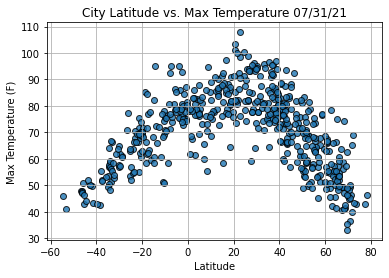

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

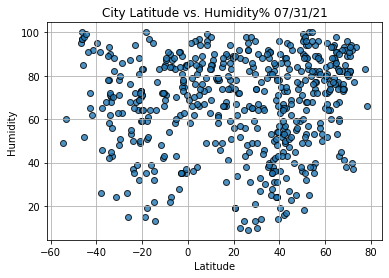

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity% "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

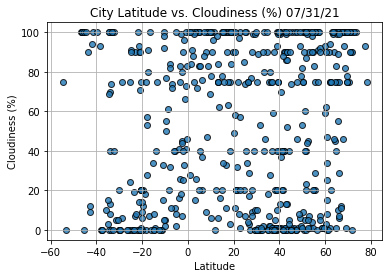

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

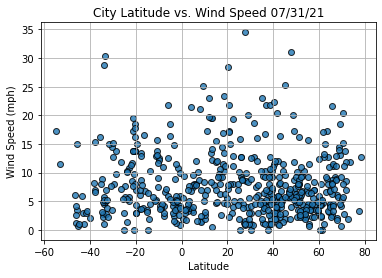

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [42]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

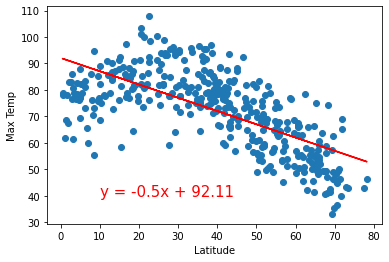

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere for Maximum Temperature", 
                       'Max Temp',(10,40))

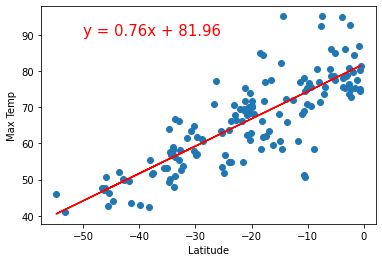

In [50]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50, 90))

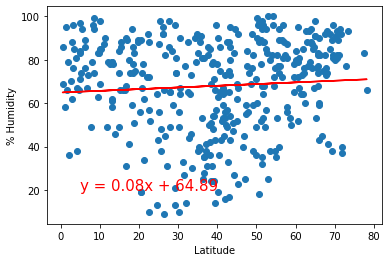

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for % Humidity", 
                       '% Humidity',(5,20))

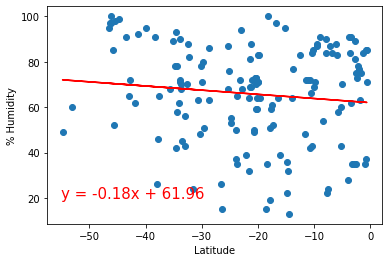

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \n for % Humidity", 
                       '% Humidity',(-55,20))

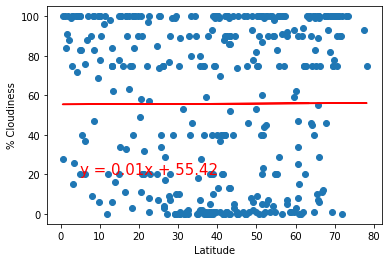

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \ for % Cloudiness", 
                       '% Cloudiness',(5,20))

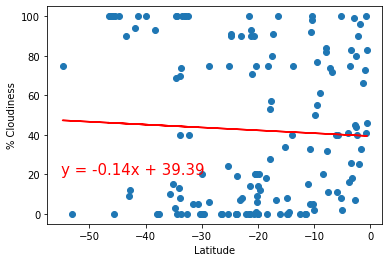

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Cloudiness", 
                       '% Cloudiness',(-55,20))

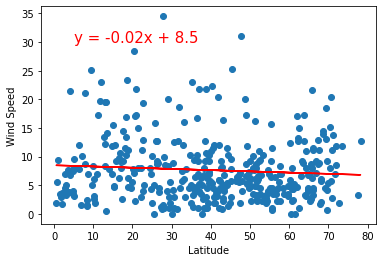

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Wind Speed", 
                       'Wind Speed',(5,30))

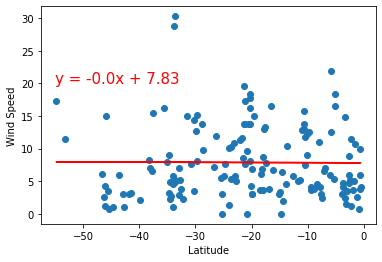

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Wind Speed", 
                       'Wind Speed',(-55,20))